In [40]:
import pandas as pd
import numpy as np
import sklearn.cluster as ac
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy  as  asp
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [15]:
df=pd.read_csv("playersData.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df=df.drop_duplicates()


In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 496
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 497 non-null    int64  
 1   Player             497 non-null    object 
 2   Pos                497 non-null    object 
 3   Age                497 non-null    int64  
 4   Tm                 497 non-null    object 
 5   G                  497 non-null    int64  
 6   GS                 497 non-null    int64  
 7   MP                 497 non-null    float64
 8   FG                 497 non-null    float64
 9   FGA                497 non-null    float64
 10  FG%                492 non-null    float64
 11  3P                 497 non-null    float64
 12  3PA                497 non-null    float64
 13  3P%                467 non-null    float64
 14  2P                 497 non-null    float64
 15  2PA                497 non-null    float64
 16  2P%                485 non

In [17]:

fig = px.scatter_3d(df, x=df['PTS'], y=df['TRB'], z=df['AST'], height = 600, width = 1000, hover_name = df['Player'])
fig.show()

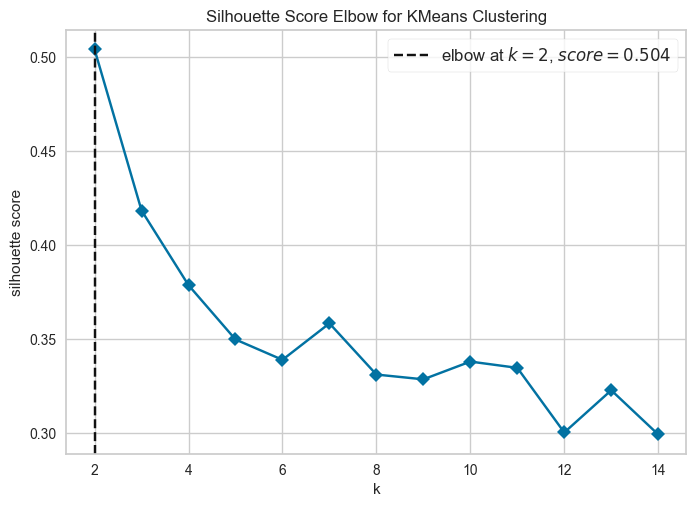

In [18]:
def elbow(df,x,y,z):
    df = df.dropna(axis=0,subset=[x,y,z])
    df_cluster = df[[x,y,z]]
    cluster = StandardScaler().fit_transform(np.array(df_cluster))
        
    model = ac.KMeans(random_state=11, init = 'k-means++', n_init = 10, max_iter=100) 

    visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette',timings=False)

    visualizer.fit(cluster)
    visualizer.show()    


elbow(df,'PTS','TRB','AST')

In [19]:
def KMeansPlot(df,N,x,y,z):

    df = df.dropna(subset=[x,y,z])
    df_cluster = df[[x,y,z]]

    scaler = StandardScaler()
    cluster =scaler.fit_transform(df_cluster.to_numpy())
    
    km = ac.KMeans(init='k-means++',random_state=10, n_init = 10, max_iter=100,n_clusters=N)
    km.fit(cluster)
    df_cluster['label'] = km.labels_
    fig = px.scatter_3d(df, x=x, y=y, z=z, color = df_cluster['label'], height = 600, width = 1000, hover_name = df['Player'])
    fig.show()
   


KMeansPlot(df,7,'PTS','TRB','AST')

C:\Users\Μπάμπης\AppData\Local\Temp\ipykernel_7912\3769098477.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
def BisectingKMeansPlot(df,N,x,y,z):

    df = df.dropna(subset=[x,y,z])
    df_cluster = df[[x,y,z]]

    scaler = StandardScaler()
    cluster =scaler.fit_transform(df_cluster.to_numpy())
    
    km = ac.BisectingKMeans(init='k-means++',random_state=10, n_init = 10, max_iter=100,n_clusters=N)
    km.fit(cluster)
    df_cluster['label'] = km.labels_
    fig = px.scatter_3d(df, x=x, y=y, z=z, color = df_cluster['label'], height = 600, width = 1000, hover_name = df['Player'])
    fig.show()
   


BisectingKMeansPlot(df,7,'PTS','TRB','AST')

C:\Users\Μπάμπης\AppData\Local\Temp\ipykernel_7912\4177110965.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
def AgglomerativeClusteringPlot(df,N,x,y,z):

    df = df.dropna(subset=[x,y,z])
    df_cluster = df[[x,y,z]]

    scaler = StandardScaler()
    cluster =scaler.fit_transform(df_cluster.to_numpy())
    
    a = ac.AgglomerativeClustering(n_clusters=None,metric='euclidean',linkage='ward',distance_threshold=10)
    a.fit(cluster)
    df_cluster['label'] = a.labels_
    fig = px.scatter_3d(df, x=x, y=y, z=z, color = df_cluster['label'], height = 600, width = 1000, hover_name = df['Player'])
    fig.show() 


AgglomerativeClusteringPlot(df,7,'PTS','TRB','AST')

C:\Users\Μπάμπης\AppData\Local\Temp\ipykernel_7912\3374896531.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
df = df.dropna(subset=['PTS','TRB','AST'])
df_cluster = df[['PTS','TRB','AST']]

nbrs = NearestNeighbors(n_neighbors=5 ).fit(df_cluster)
distances, indices = nbrs.kneighbors(df_cluster)
distance_desc = sorted(distances[:,4], reverse=True)
        
fig=px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

fig.show()

In [23]:
def DBSCANPlot(df,x,y,z):

    df = df.dropna(subset=[x,y,z])
    df_cluster = df[[x,y,z]]

    scaler = StandardScaler()
    cluster =scaler.fit_transform(df_cluster.to_numpy())
    
    a = ac.DBSCAN(eps=0.44,min_samples=5,metric='euclidean')
    a.fit(cluster)
    df_cluster['label'] = a.labels_
    fig = px.scatter_3d(df, x=x, y=y, z=z, color = df_cluster['label'], height = 600, width = 1000, hover_name = df['Player'])
    fig.show() 


DBSCANPlot(df,'PTS','TRB','AST')

C:\Users\Μπάμπης\AppData\Local\Temp\ipykernel_7912\4159302841.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
df=df[(df['MP']>10) & (df['G']>10)]
df.dropna(subset=['FG','FGA','3P','3PA','2P','2PA','eFG%','FT','FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','PTS'])
dfReducted=df[['FG','FGA','3P','3PA','2P','2PA','eFG%','FT','FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','PTS']]
dfReducted.dropna

scaler = StandardScaler()
cluster =scaler.fit_transform(dfReducted)
    
pca=PCA(n_components=2)
PCAcomponents=pca.fit_transform(cluster)
newdf=pd.DataFrame(data=PCAcomponents,columns=['pca1','pca2'])

a = ac.KMeans(init='k-means++',random_state=10, n_init = 10, max_iter=100,n_clusters=5)

a.fit(newdf)
df['label'] = a.labels_
fig = px.scatter(newdf,x='pca1',y='pca2', color = df['label'],height = 600, width = 1000, hover_name = df['Player'])
fig.show() 
